In [1]:
print('hi')

hi


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
import warnings
warnings.simplefilter('ignore')

In [8]:
df = pd.read_csv('../artifacts/raw/train.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29020 entries, 0 to 29019
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            29020 non-null  object 
 1   no_of_adults                          29020 non-null  int64  
 2   no_of_children                        29020 non-null  int64  
 3   no_of_weekend_nights                  29020 non-null  int64  
 4   no_of_week_nights                     29020 non-null  int64  
 5   type_of_meal_plan                     29020 non-null  object 
 6   required_car_parking_space            29020 non-null  int64  
 7   room_type_reserved                    29020 non-null  object 
 8   lead_time                             29020 non-null  int64  
 9   arrival_year                          29020 non-null  int64  
 10  arrival_month                         29020 non-null  int64  
 11  arrival_date   

In [10]:
df.drop(columns=['Booking_ID'],inplace=True)

In [11]:
df.shape

(29020, 18)

In [12]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(7661)

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.shape

(21359, 18)

In [16]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [17]:
categorical_columns = ['type_of_meal_plan','required_car_parking_space','room_type_reserved','market_segment_type', 'repeated_guest','booking_status']
numerical_columns = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights','lead_time','arrival_year', 'arrival_month',
       'arrival_date','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

In [29]:
df['no_of_weekend_nights'].value_counts()

no_of_weekend_nights
0    9178
1    6063
2    5882
3     110
4      91
5      21
6      14
Name: count, dtype: int64

## DATA ANALYSIS

### UNIVARIATE ANALYSIS

In [26]:
def num_plot_dist(dfr , num_features):
    fig  , axes = plt.subplots(len(num_features),2,figsize = (20,len(num_features)*3))
    if len(num_features)==1:
        axes = [axes]
    for i , column in enumerate(num_features):
        sns.histplot(data=dfr,x=column,ax=axes[i][0] , kde=True , palette='Blues')
        axes[i][0].set_title(f'Histogram for {column}')

        sns.boxplot(data=dfr,x=column , ax=axes[i][1] , palette='Blues')
        axes[i][1].set_title(f'Boxplot for {column}')
    
    plt.tight_layout()
    plt.show()


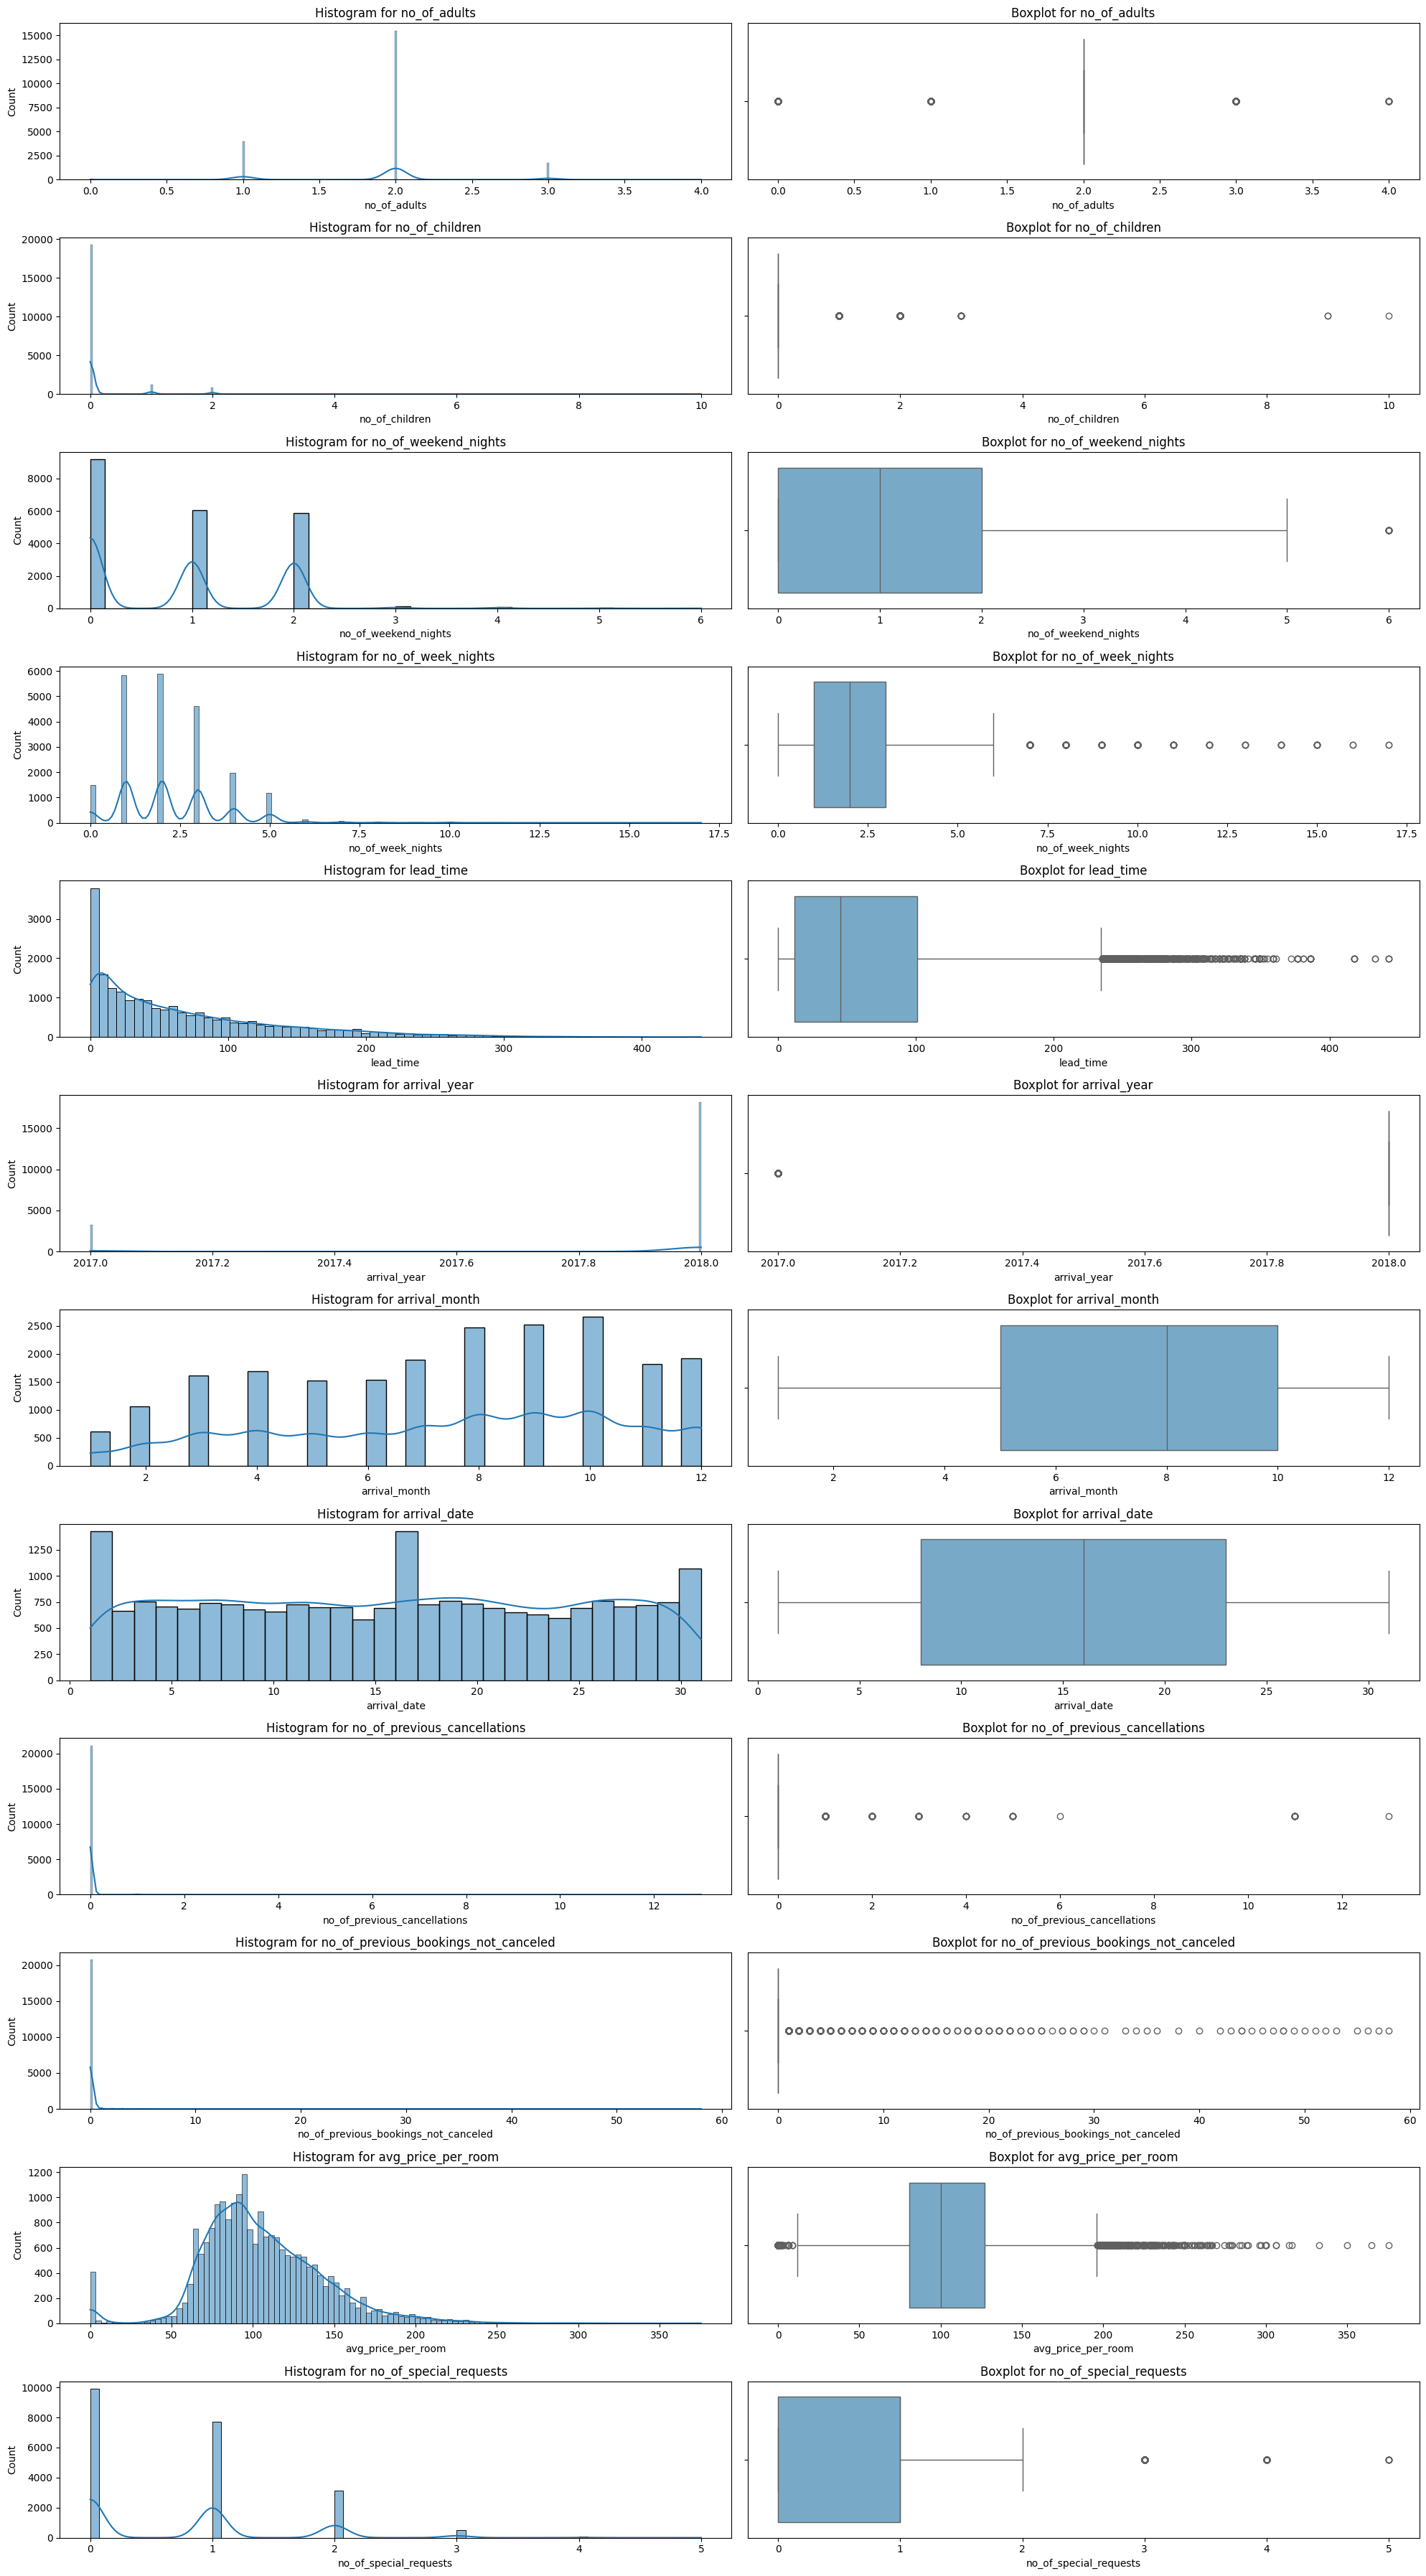

In [27]:
num_plot_dist(dfr=df,num_features=numerical_columns)

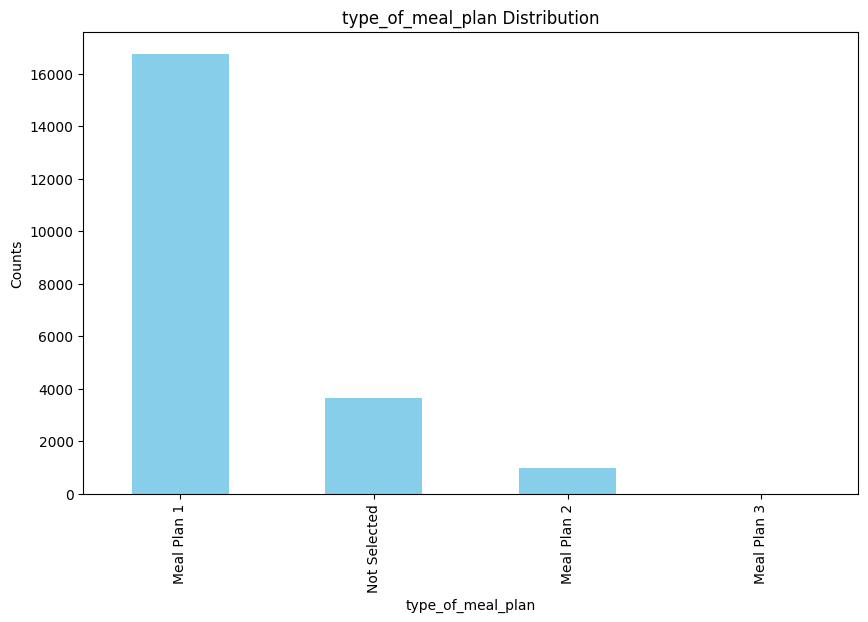

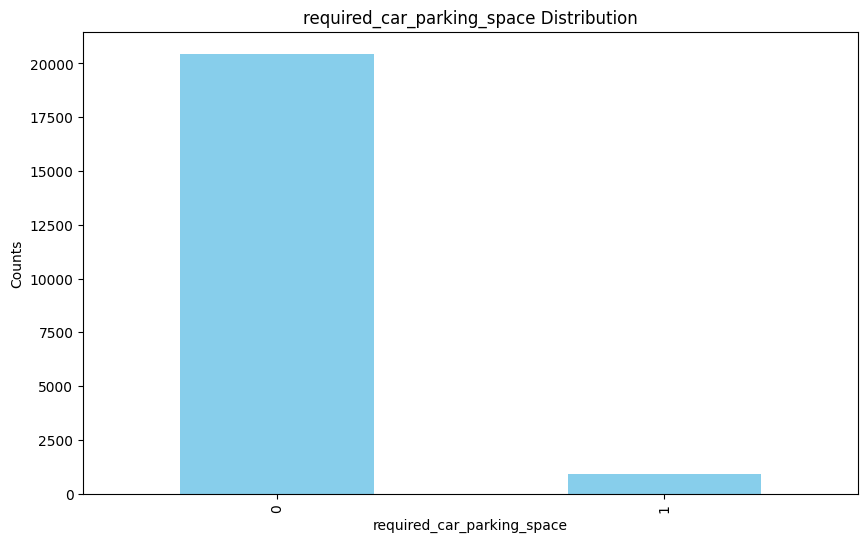

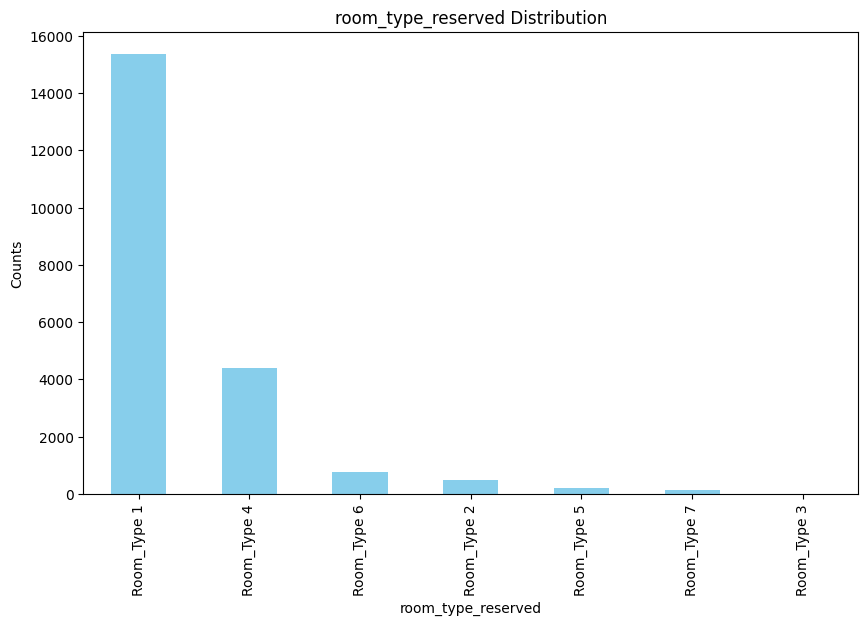

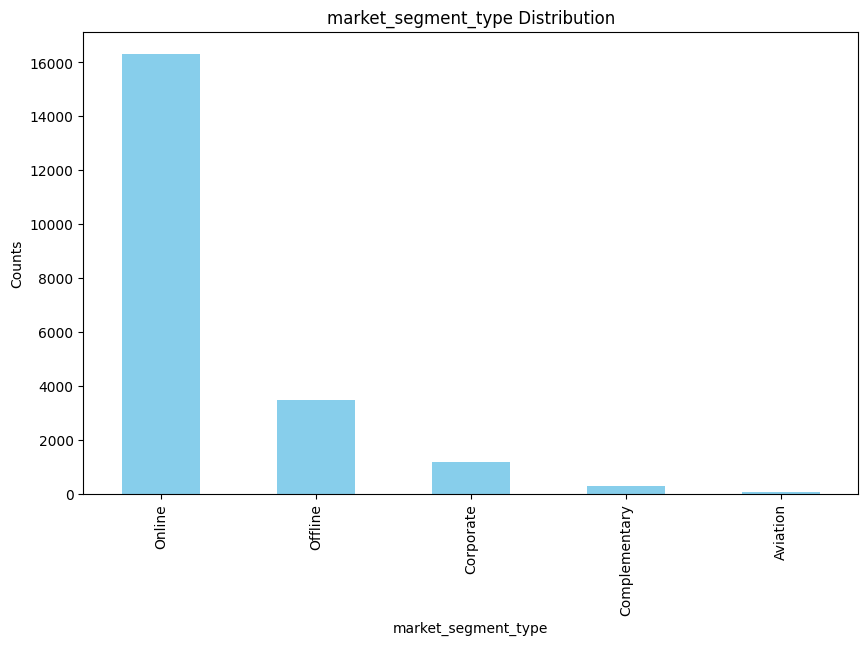

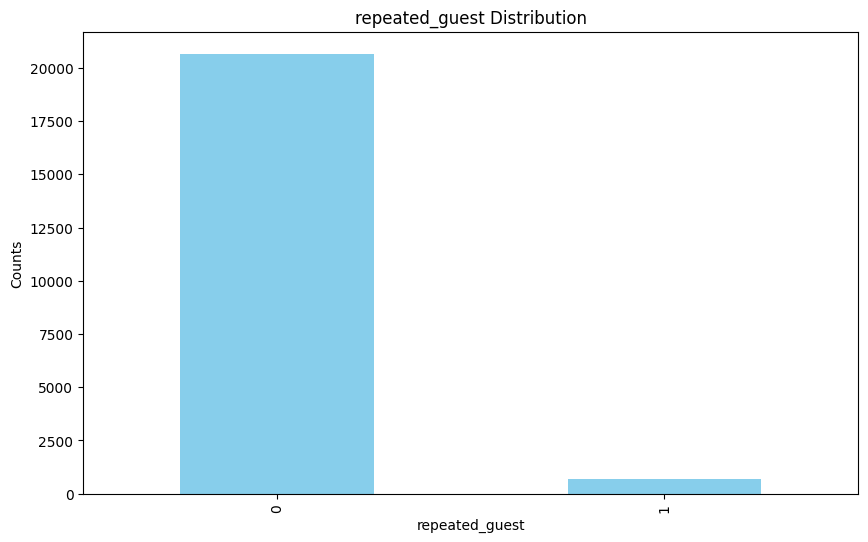

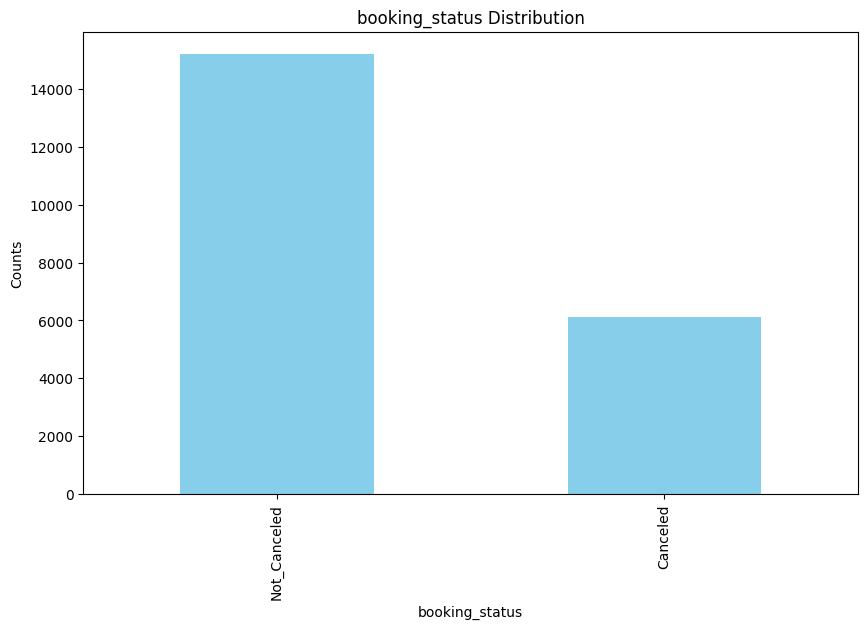

In [30]:
for cat_features in categorical_columns:
    plt.figure(figsize=(10,6))
    df[cat_features].value_counts().plot(kind='bar',color='skyblue')
    plt.title(f'{cat_features} Distribution')
    plt.xlabel(cat_features)
    plt.ylabel('Counts')
    plt.show()

### Bivariate Analysis

In [31]:
def plot_bivariate_numerical(dfr,target , num_features):
    num_plots = len(num_features)
    num_rows = (num_plots+1)//2

    fig , axes = plt.subplots(num_rows, 2 , figsize=(15,num_rows*5))
    axes = axes.flatten()

    for i, column in enumerate(num_features):
        sns.boxplot(x=target,y=column,ax=axes[i], data=dfr , palette='Blues')
        axes[i].set_title(f'{column} VS {target}')

    plt.tight_layout()
    plt.show()

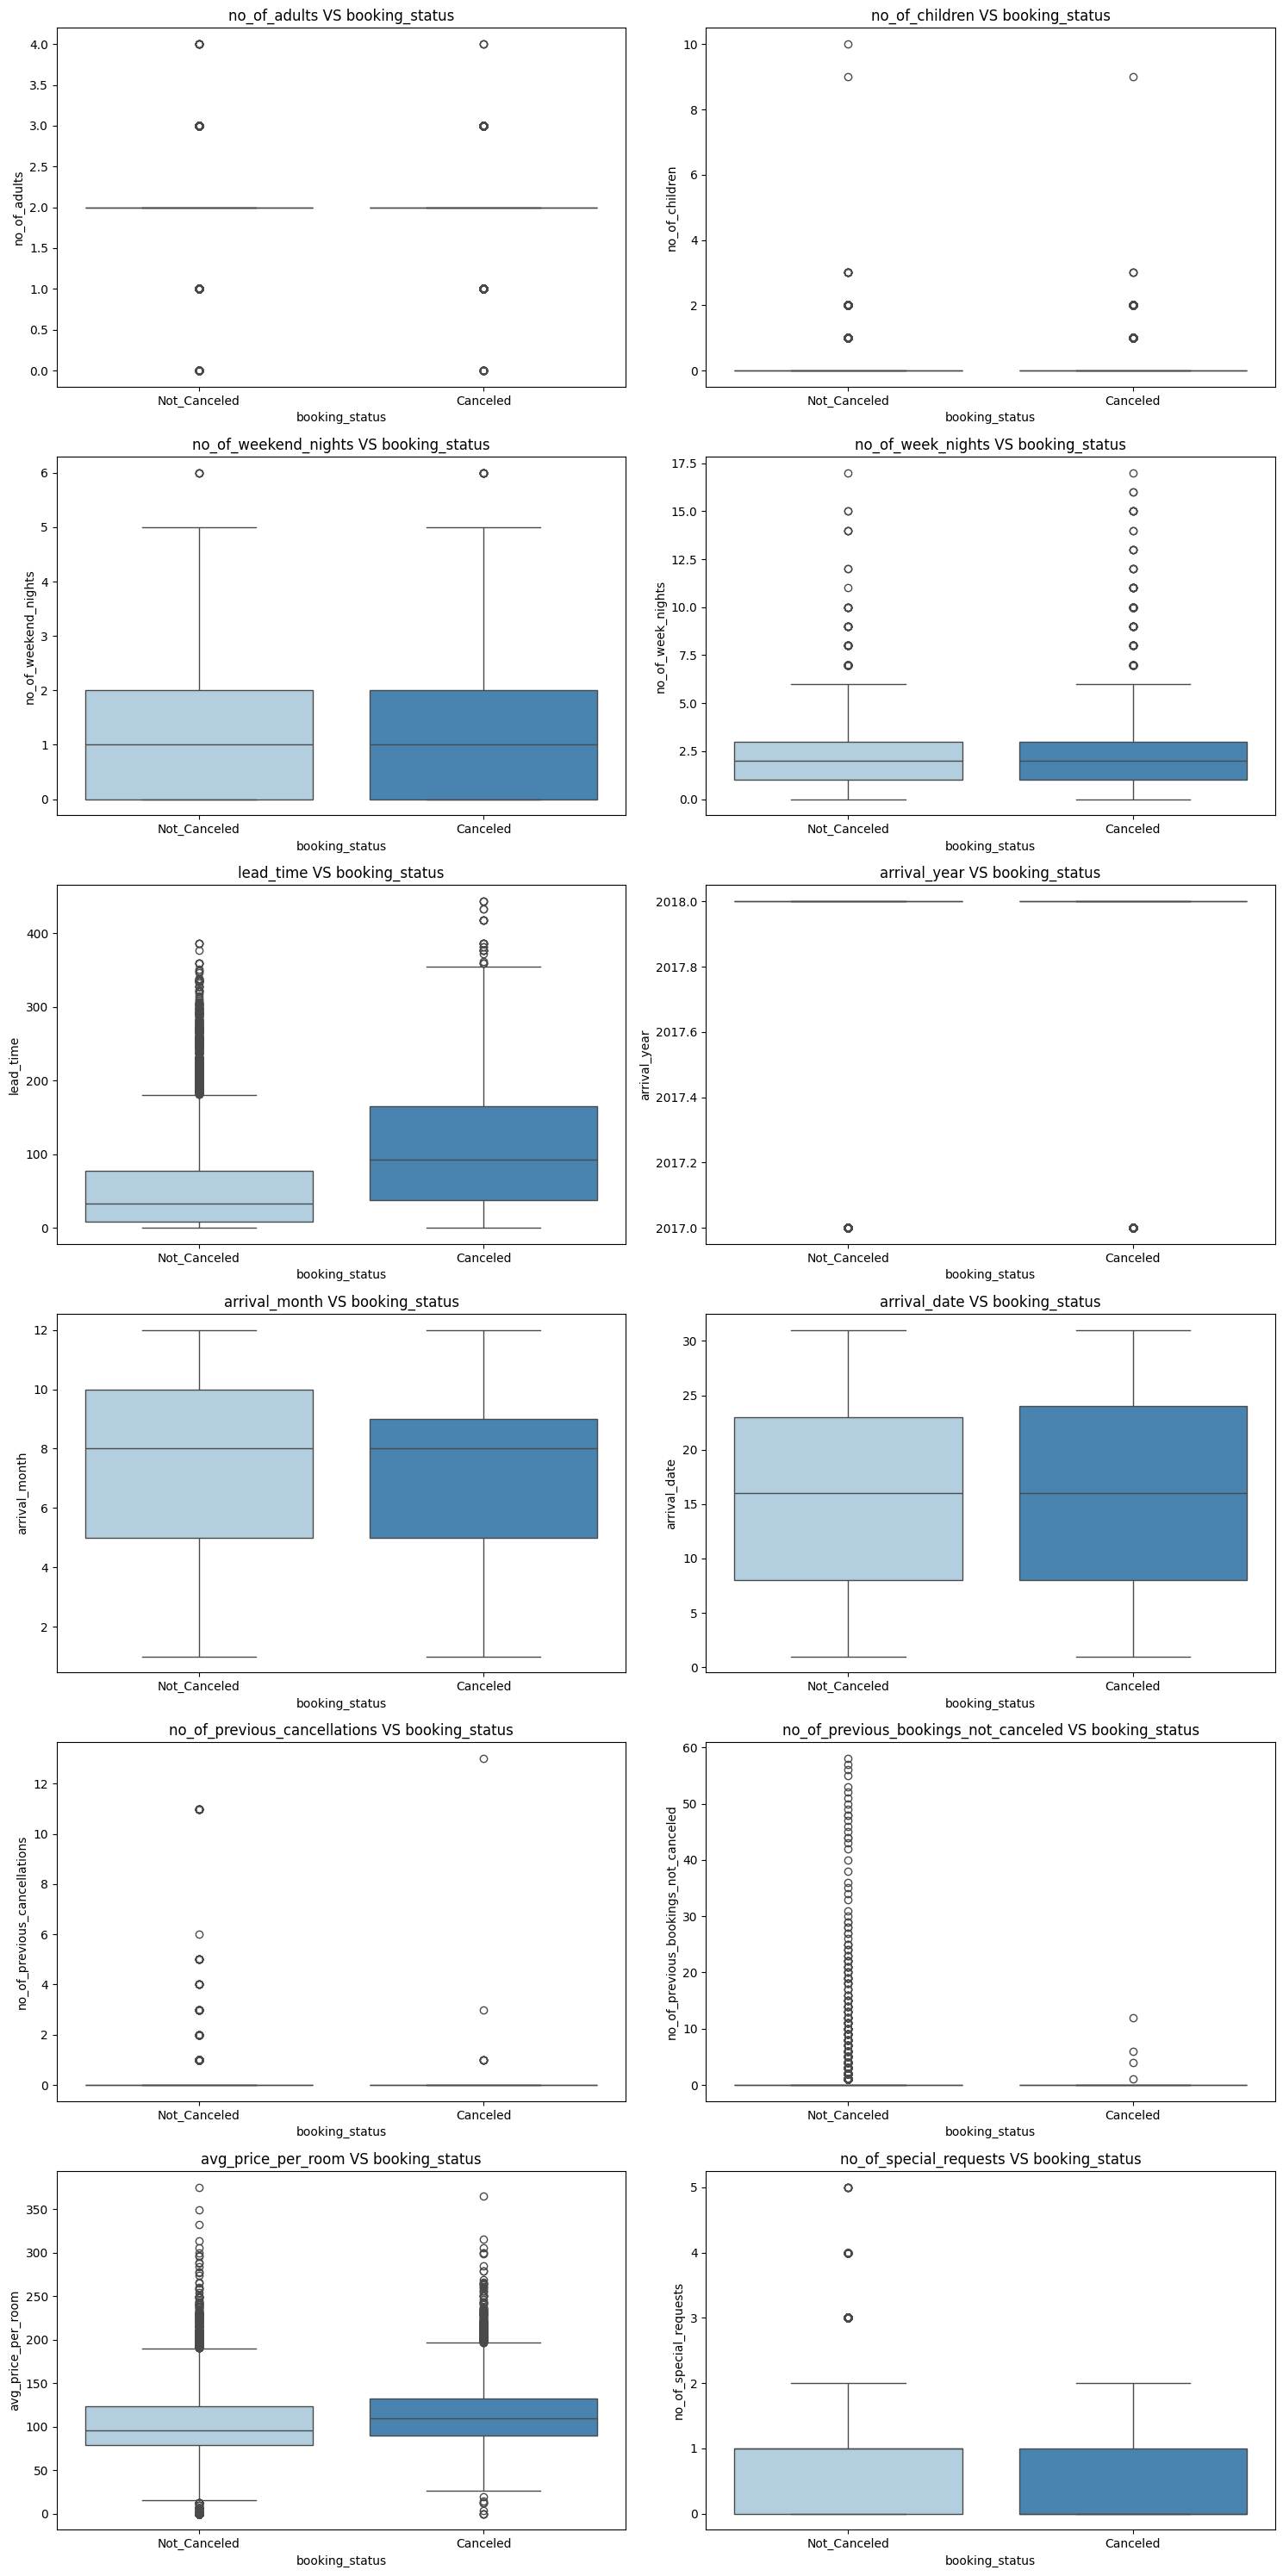

In [32]:
plot_bivariate_numerical(dfr=df,target='booking_status',num_features=numerical_columns)

<Axes: xlabel='arrival_month', ylabel='avg_price_per_room'>

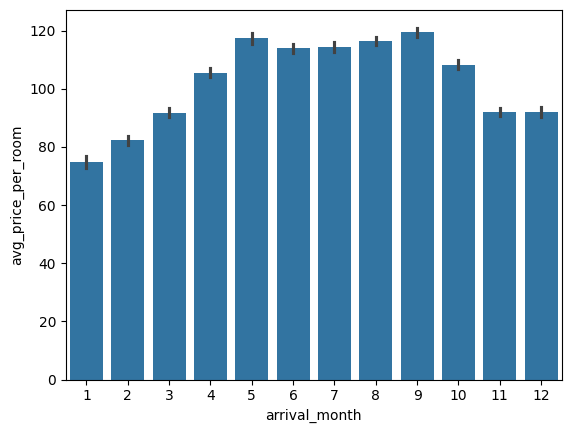

In [33]:
sns.barplot(x='arrival_month',y='avg_price_per_room',data=df)

In [42]:
def plot_bivaraite_cat(dfr,target, cat_features):

    num_features = len(cat_features)
    num_rows = (num_features+1)//2

    fig, axes = plt.subplots(num_rows , 2 , figsize=(15,num_rows*5))
    axes = axes.flatten()

    for i , feature in enumerate(cat_features):
        sns.countplot(x=feature,hue=target,data=dfr,palette='Set2' , ax = axes[i])
        axes[i].set_title(f'{feature} VS {target}')
        axes[i].tick_params(axis='x',rotation=90)

    plt.tight_layout()
    plt.show()

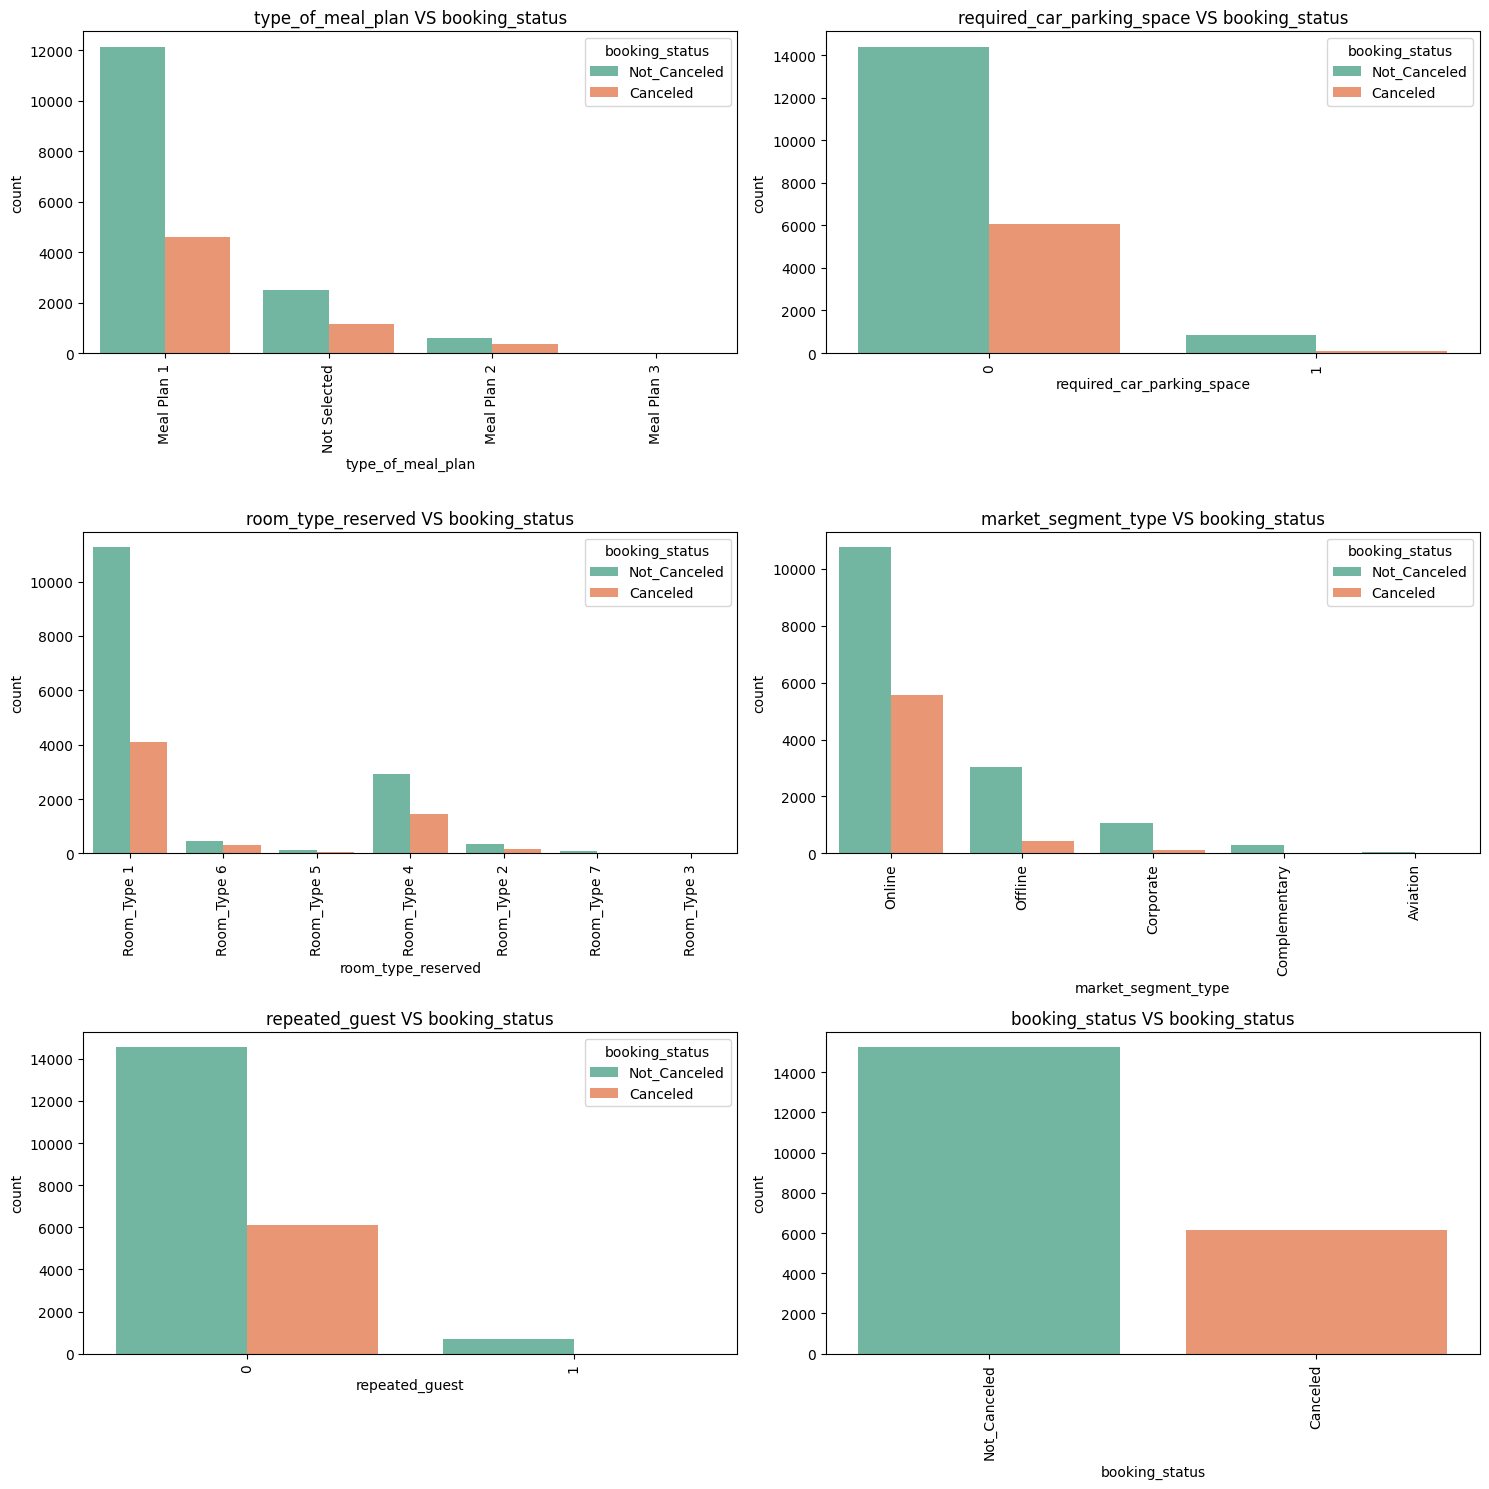

In [43]:
plot_bivaraite_cat(df,'booking_status',categorical_columns)

## DATA PROCESSING

In [44]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [45]:
## Label Encoding 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

mapping={}

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])
    mapping[col] = {label:code for label,code in zip(label_encoder.classes_,label_encoder.transform(label_encoder.classes_))}

In [46]:
mapping

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [47]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0,0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  int64  
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  int64  
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [49]:
## Multicollinearity
!pip install statsmodels

  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.6 MB 3.4 MB/s eta 0:00:03
   ----- ---------------------------------- 1.3/9.6 MB 2.9 MB/s eta 0:00:03
   -------- ------------------------------- 2.1/9.6 MB 3.0 MB/s eta 0:00:03
   ---------- ----------------------------- 2.6/9.6 MB 3.0 MB/s eta 0:00:03
   -------------- ------------------------- 3.4/9.6 MB 3.2 MB/s eta 0:00:02
   ----------------- ---------------------- 4.2/9.6 MB 3.3 MB/s eta 0:00:02
   --------------------- ------------------ 5.2/9.6 MB 3.4 MB/s eta 0:00:02
   ------------------------ --------------- 5.8/9.6 MB 3.3 MB/s eta 0:00:02
   --------------------------- ------------ 6.6/9.6 MB 3.4 MB/s eta 0:00:01
   ------------------------------ --------- 7.3/9.6 MB 3.4 MB/s eta 0:00:01
   ---------------------------------

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [51]:
x = add_constant(df)

vif_data = pd.DataFrame()

vif_data['feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

In [52]:
vif_data

,feature,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


In [ ]:
# No mullticolinearity as vif is less than 5

In [53]:
corr = df.corr()

In [54]:
corr

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.049738,0.092764,0.114218,-0.005977,0.000419,0.275089,0.150995,0.096366,0.004833,0.018382,0.310783,-0.238974,-0.063739,-0.143903,0.327749,0.156833,-0.097198
no_of_children,-0.049738,1.000000,0.011033,0.019408,-0.102631,0.018089,0.351786,0.010094,0.036248,0.002606,0.027934,0.103359,-0.048678,-0.020954,-0.029112,0.352640,0.099069,-0.060030
no_of_weekend_nights,0.092764,0.011033,1.000000,0.223154,-0.041123,-0.057417,0.029964,0.131240,0.029016,0.011300,0.006921,0.091510,-0.088633,-0.028935,-0.040008,-0.003579,0.013803,-0.067944
no_of_week_nights,0.114218,0.019408,0.223154,1.000000,-0.073247,-0.061798,0.085547,0.223953,0.022199,0.030029,-0.000633,0.116978,-0.115186,-0.033133,-0.051829,0.018420,0.032304,-0.124415
type_of_meal_plan,-0.005977,-0.102631,-0.041123,-0.073247,1.000000,-0.024666,-0.245616,-0.055124,0.094627,0.008576,-0.006094,0.184654,-0.075476,-0.017205,-0.044891,-0.100708,-0.011933,-0.035864
required_car_parking_space,0.000419,0.018089,-0.057417,-0.061798,-0.024666,1.000000,0.016335,-0.046767,0.010158,-0.015330,-0.009352,-0.039210,0.113582,0.026876,0.066665,0.055536,0.075479,0.092511
room_type_reserved,0.275089,0.351786,0.029964,0.085547,-0.245616,0.016335,1.000000,-0.014666,0.090492,0.001906,0.024315,0.089176,-0.045353,-0.013842,-0.024727,0.490983,0.086319,-0.072128
lead_time,0.150995,0.010094,0.131240,0.223953,-0.055124,-0.046767,-0.014666,1.000000,0.169463,0.132140,0.034112,0.140396,-0.148948,-0.053930,-0.087026,-0.044061,-0.012787,-0.368151
arrival_year,0.096366,0.036248,0.029016,0.022199,0.094627,0.010158,0.090492,0.169463,1.000000,-0.322786,0.011340,0.111445,-0.010158,0.011111,0.025551,0.174569,0.000594,-0.149673
arrival_month,0.004833,0.002606,0.011300,0.030029,0.008576,-0.015330,0.001906,0.132140,-0.322786,1.000000,-0.020386,-0.017885,0.001744,-0.043586,-0.003881,0.066156,0.136037,0.015898


<Axes: >

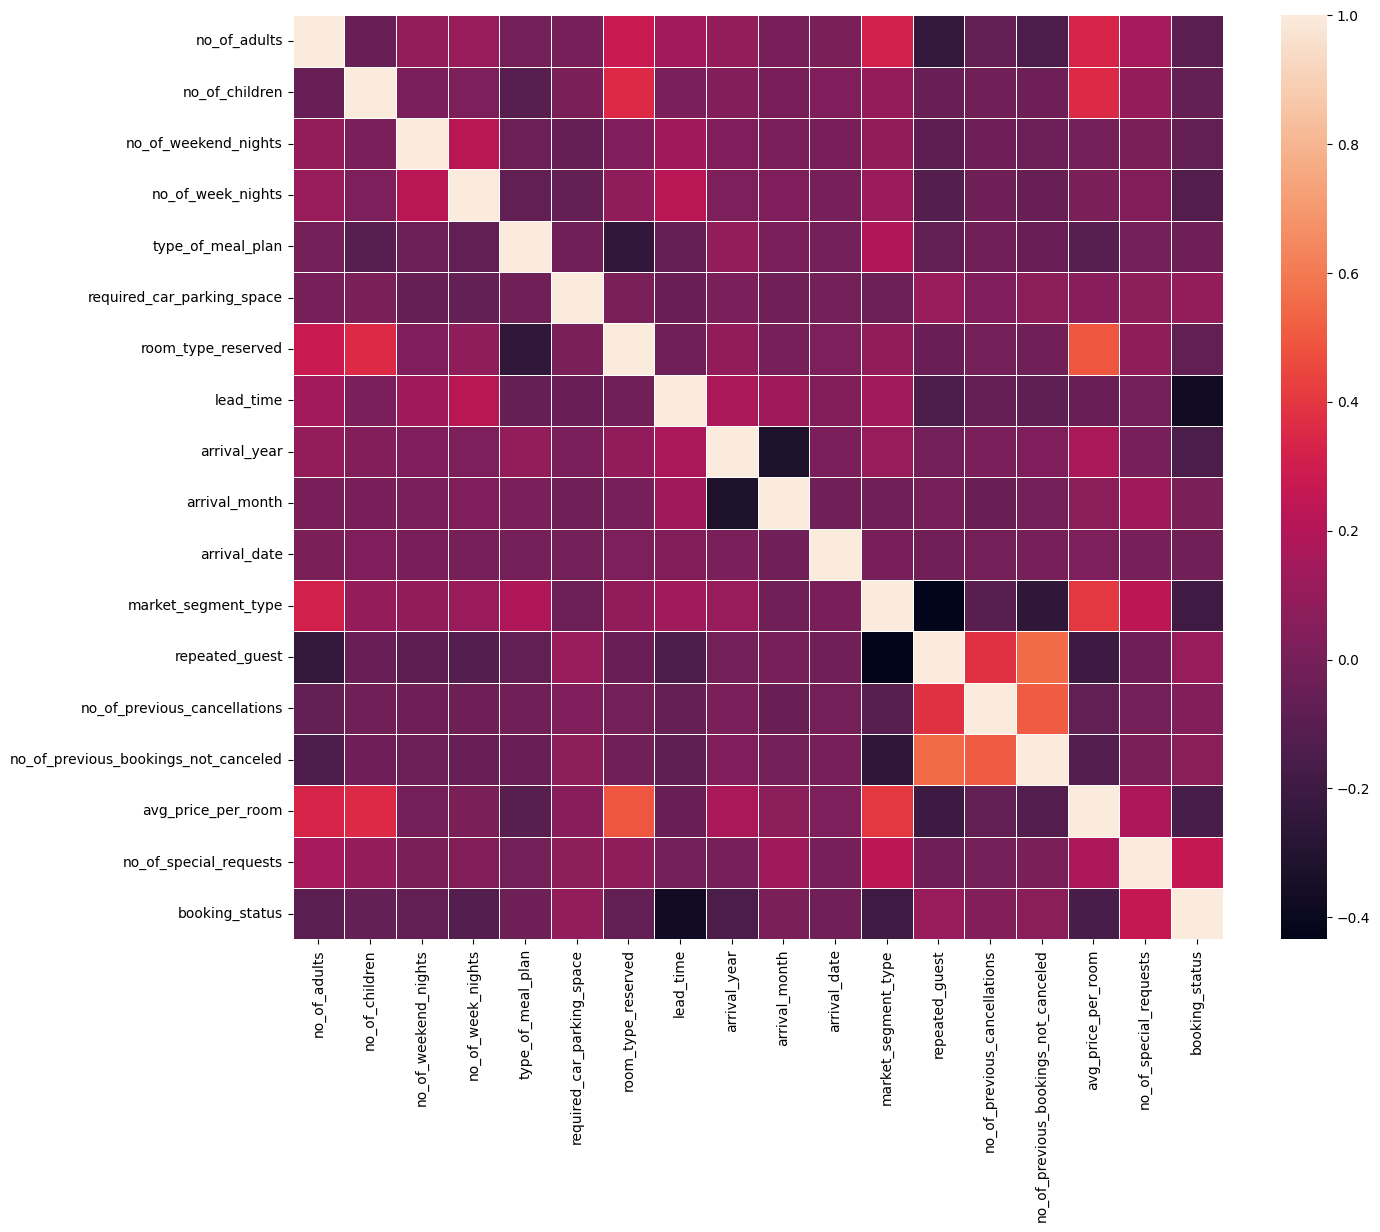

In [59]:
plt.figure(figsize=(15,12))
sns.heatmap(corr,linewidths=0.5)

In [62]:
### Skewness 

skewness = df.skew()
skewness

no_of_adults                            -0.305652
no_of_children                           3.029609
no_of_weekend_nights                     0.088633
no_of_week_nights                       -0.375219
type_of_meal_plan                        1.555100
required_car_parking_space               4.538315
room_type_reserved                       1.112290
lead_time                               -0.748187
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            13.270580
no_of_previous_bookings_not_canceled     7.619850
avg_price_per_room                      -4.962253
no_of_special_requests                   0.298868
booking_status                          -0.942305
dtype: float64

In [61]:
## Log transformation for skewness

for col in df.columns:
    if skewness[col] > 0.5:
        df[col] = np.log1p(df[col])


In [63]:
### Imbalanced Data 
df['booking_status'].value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [64]:
X = df.drop(columns=['booking_status'])
y = df['booking_status']

In [65]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [67]:
!pip install imbalanced-learn

In [68]:
y.value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [70]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_res , y_res = smote.fit_resample(X,y)


In [71]:
y_res.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [72]:
balanced_df = pd.DataFrame(x_res,columns=x_res.columns)
balanced_df['booking_status'] = y_res 
balanced_df.shape

(30462, 18)

In [73]:
df = balanced_df.copy()

## Feature Selection

In [74]:
from  sklearn.ensemble import RandomForestClassifier
X = balanced_df.drop(columns=['booking_status'])
y = balanced_df['booking_status']

In [75]:
model = RandomForestClassifier(random_state=42)
model.fit(X,y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [76]:
feature_importtance = model.feature_importances_

In [79]:
feature_importtance_df = pd.DataFrame({
    'feature':X.columns,
    'importance':feature_importtance
})
top_imp_df = feature_importtance_df.sort_values(by='importance',ascending=False)

In [80]:
top_10_features = top_imp_df['feature'].head(10).values

In [81]:
top_10_features

array(['lead_time', 'no_of_special_requests', 'avg_price_per_room',
       'arrival_date', 'arrival_month', 'no_of_week_nights',
       'market_segment_type', 'no_of_weekend_nights', 'arrival_year',
       'room_type_reserved'], dtype=object)

In [83]:
top_10_df = df[top_10_features.tolist() + ['booking_status']]
top_10_df.head()

,lead_time,no_of_special_requests,avg_price_per_room,arrival_date,arrival_month,no_of_week_nights,market_segment_type,no_of_weekend_nights,arrival_year,room_type_reserved,booking_status
0,3.295837,0.000000,5.087596,17,10,0.693147,4,1.098612,2017,0.0,1
1,4.595120,1.098612,4.808111,16,7,0.693147,4,0.693147,2018,0.0,1
2,6.073045,0.000000,4.262680,8,9,1.386294,3,0.000000,2018,0.0,0
3,5.278115,0.000000,4.293878,8,8,1.791759,3,1.098612,2018,0.0,1
4,5.241747,0.000000,4.875197,15,6,1.098612,3,0.000000,2018,0.0,0


## Model Selection

In [84]:
!pip install xgboost lightgbm

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
    --------------------------------------- 0.8/56.8 MB 2.1 MB/s eta 0:00:27
    --------------------------------------- 1.0/56.8 MB 2.1 MB/s eta 0:00:27
   - -------------------------------------- 1.6/56.8 MB 1.9 MB/s eta 0:00:30
   - -------------------------------------- 2.1/56.8 MB 2.2 MB/s eta 0:00:26
   - -------------------------------------- 2.6/56.8 MB 2.3 MB/s eta 0:00:25
   -- ------------------------------------- 3.4/56.8 MB 2.4 MB/s eta 0:00:23
   -- ------------------------------------- 3.9/56.8 MB 2.4 MB/s eta 0:00:22
   --- ------------------------------------ 4.5/56.8 MB 2.5 MB/s eta 0:00:21
   --- ------------------------------------ 5.0/56.8 MB 2.5 MB/s eta 0:00:21
   --- ------------------------------------ 5.5/56.8 MB 2.5 MB/s eta 0:00:21
   ---- ------------

In [85]:
df = top_10_df.copy()

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [87]:
X = df.drop(columns='booking_status')
y = df['booking_status']

In [88]:
X_train , X_test ,y_train , y_test = train_test_split(X,y,train_size=
                                                      0.2,random_state=42)

In [91]:
classifiers ={
    'Random Forest':RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Gradient Boosting':GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Decision Tree' : DecisionTreeClassifier(random_state=42),
    'KNN' : KNeighborsClassifier(),
    'Naive Bayes' : GaussianNB(),
    'XGboost':XGBClassifier(),
    'AdaBoost':AdaBoostClassifier(),
    'LGBM' : LGBMClassifier()
}

In [90]:
metrics = {
    'Models': [],
    'Accuracy':[],
    'Precision':[],
    'Recall':[],
    'F1 Score':[]
}

In [92]:
for model_name, classifier in classifiers.items():
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)

    metrics['Models'].append(model_name)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1 Score'].append(f1)


In [93]:
metrics_df = pd.DataFrame(metrics)
metrics_df

,Models,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.863644,0.849365,0.885273,0.866947
1,Logistic Regression,0.766639,0.775569,0.752801,0.764015
2,Gradient Boosting,0.859664,0.842629,0.885763,0.863658
3,Support Vector Machine,0.498195,0.000000,0.000000,0.000000
4,Decision Tree,0.807468,0.806656,0.810614,0.808630
5,KNN,0.731596,0.787854,0.636520,0.704148
6,Naive Bayes,0.696717,0.814237,0.512552,0.629096
7,XGboost,0.872302,0.856606,0.895413,0.875580
8,AdaBoost,0.802339,0.805423,0.799166,0.802282
9,LGBM,0.877062,0.858174,0.904489,0.880723


In [94]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [95]:
x = df.drop(columns='booking_status')
y = df['booking_status']

In [96]:
X_train , X_test , y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [97]:
rf = RandomForestClassifier()

In [102]:
params_dist = {
    'n_estimators': randint(100,500),
    'max_depth': randint(10,50),
    'min_samples_split':randint(2,10),
    'min_samples_leaf':randint(1,5),
    'bootstrap':[True,False],
}

In [103]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=params_dist,
    n_iter=5,
    cv=5,
    verbose=2,
    random_state=42,
    scoring='accuracy'
)

In [104]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.6s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.9s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.8s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.6s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.5s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   4.9s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   5.4s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   5.5s
[CV]

,estimator,RandomForestClassifier()
,param_distributions,"{'bootstrap': [True, False], 'max_depth': <scipy.stats....0025EBA75ACC0>, 'min_samples_leaf': <scipy.stats....0025EBA62E6C0>, 'min_samples_split': <scipy.stats....0025EBA62C8F0>, ...}"
,n_iter,5
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [105]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [106]:
best_rf_model = random_search.best_estimator_

In [107]:
y_pred = best_rf_model.predict(X_test)

In [108]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [109]:
print(accuracy)
print(precision)
print(recall)
print(f1)

0.9053011652716232
0.9001605136436597
0.9133550488599349
0.906709781729992


In [110]:
## Save model 
import joblib
joblib.dump(best_rf_model,'random_forst.pkl')

['random_forst.pkl']